# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
%pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('south')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: east
step 2 - action: west
step 3 - action: north
step 4 - action: south
step 5 - action: south
step 6 - action: south
step 7 - action: south
step 8 - action: north
step 9 - action: south
step 10 - action: south
step 11 - action: south
step 12 - action: suck
step 13 - action: south
step 14 - action: west
step 15 - action: east
step 16 - action: east
step 17 - action: suck
step 18 - action: north
step 19 - action: south


2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 🧠 Helper function: visualize the environment
# -----------------------------------------------------------
def show_environment(room, agent_pos, step):
    """
    Hiển thị lưới môi trường (clean/dirty) và vị trí của agent.
    """
    plt.figure(figsize=(4, 4))
    grid = np.copy(room)

    # Vẽ ô sạch (0) = trắng, ô bẩn (1) = nâu
    cmap = plt.cm.get_cmap("YlOrBr", 2)
    plt.imshow(grid, cmap=cmap, origin='upper')

    # Vẽ vị trí của agent
    y, x = agent_pos
    plt.scatter(x, y, c='blue', s=200, marker='o', label='Agent')

    plt.title(f"Step {step}")
    plt.xticks(range(room.shape[1]))
    plt.yticks(range(room.shape[0]))
    plt.grid(True, color="gray", linewidth=0.5)
    plt.show()


# -----------------------------------------------------------
# 🧩 Simulation Environment
# -----------------------------------------------------------
def vacuum_environment(agent_function, grid_size=(4, 4), dirt_prob=0.4,
                       max_steps=50, verbose=True, visualize=False):
    """
    Mô phỏng môi trường hút bụi theo mô hình PEAS.

    Parameters:
    - agent_function: hàm agent nhận (bumpers, dirty) và trả về action.
    - grid_size: kích thước môi trường (rows, cols).
    - dirt_prob: xác suất mỗi ô khởi tạo là bẩn.
    - max_steps: giới hạn số bước mô phỏng.
    - verbose: in chi tiết hành động.
    - visualize: bật hình ảnh minh họa sau mỗi bước.

    Returns:
    - performance: số bước agent thực hiện để làm sạch tất cả các ô.
    - cleaned_count: tổng số ô đã được hút bụi.
    """

    # ---  Khởi tạo môi trường ---
    room = np.random.choice([0, 1], size=grid_size, p=[1 - dirt_prob, dirt_prob])
    agent_pos = [0, 0]  # bắt đầu ở góc trên trái
    cleaned_count = 0
    total_steps = 0

    # ---  Vòng lặp mô phỏng ---
    for step in range(max_steps):
        total_steps += 1

        # Lấy trạng thái cảm biến
        y, x = agent_pos
        dirty = room[y, x] == 1
        bumpers = {
            "north": y == 0,
            "south": y == grid_size[0] - 1,
            "west": x == 0,
            "east": x == grid_size[1] - 1
        }

        # Agent chọn hành động
        action = agent_function(bumpers, dirty)

        # In thông tin (nếu bật verbose)
        if verbose:
            print(f"Step {step:02d}: Agent at {agent_pos}, dirty={dirty}, action={action}")

        # Hiển thị hình ảnh (nếu bật visualize)
        if visualize:
            show_environment(room, agent_pos, step)

        # ---  Môi trường phản ứng với hành động ---
        if action == "suck":
            if dirty:
                room[y, x] = 0  # làm sạch ô hiện tại
                cleaned_count += 1

        elif action == "north" and not bumpers["north"]:
            agent_pos[0] -= 1
        elif action == "south" and not bumpers["south"]:
            agent_pos[0] += 1
        elif action == "west" and not bumpers["west"]:
            agent_pos[1] -= 1
        elif action == "east" and not bumpers["east"]:
            agent_pos[1] += 1
        else:
            # Nếu hành động đụng tường hoặc không hợp lệ, bỏ qua
            pass

        # ---  Kiểm tra điều kiện kết thúc ---
        if np.sum(room) == 0:
            if verbose:
                print(f"\n✅ All squares cleaned in {total_steps} steps!")
            break

    performance = total_steps
    return performance, cleaned_count


Show that your environment works with the simple randomized agent from above.

In [ ]:
import numpy as np

# --- Simple randomized agent from the previous part ---
def simple_randomized_agent(bumpers, dirty):
    actions = ["north", "east", "west", "south", "suck"]
    return np.random.choice(actions)


# --- Run the simulation ---
performance, cleaned = vacuum_environment(
    simple_randomized_agent,
    grid_size=(4, 4),      # môi trường 4x4
    dirt_prob=0.4,         # xác suất 40% ô bẩn ban đầu
    max_steps=30,          # tối đa 30 bước
    verbose=True,          # in chi tiết từng bước
    visualize=False         # tắt hình ảnh (bật True nếu muốn xem lưới)
)

print("\n===== Simulation Summary =====")
print(f"Total steps taken: {performance}")
print(f"Total squares cleaned: {cleaned}")
# Your code and description goes here

Step 00: Agent at [0, 0], dirty=False, action=north
Step 01: Agent at [0, 0], dirty=False, action=west
Step 02: Agent at [0, 0], dirty=False, action=west
Step 03: Agent at [0, 0], dirty=False, action=south
Step 04: Agent at [1, 0], dirty=True, action=east
Step 05: Agent at [1, 1], dirty=True, action=west
Step 06: Agent at [1, 0], dirty=True, action=east
Step 07: Agent at [1, 1], dirty=True, action=east
Step 08: Agent at [1, 2], dirty=False, action=west
Step 09: Agent at [1, 1], dirty=True, action=north
Step 10: Agent at [0, 1], dirty=False, action=south
Step 11: Agent at [1, 1], dirty=True, action=north
Step 12: Agent at [0, 1], dirty=False, action=suck
Step 13: Agent at [0, 1], dirty=False, action=west
Step 14: Agent at [0, 0], dirty=False, action=north
Step 15: Agent at [0, 0], dirty=False, action=suck
Step 16: Agent at [0, 0], dirty=False, action=south
Step 17: Agent at [1, 0], dirty=True, action=east
Step 18: Agent at [1, 1], dirty=True, action=east
Step 19: Agent at [1, 2], dirty=

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
import numpy as np

def simple_reflex_agent(bumpers, dirty):
    """
    A simple reflex-based vacuum agent.
    The agent reacts to dirt by cleaning it and avoids walls.

    Parameters:
    - bumpers: dictionary indicating walls around the agent
               e.g., {"north": True, "south": False, "east": False, "west": True}
    - dirty: boolean, True if the current square is dirty

    Returns:
    - action: one of ["north", "south", "east", "west", "suck"]
    """

    #  Nếu ô hiện tại bẩn, hút bụi ngay
    if dirty:
        return "suck"

    # Nếu không bẩn, chọn ngẫu nhiên hướng không có tường
    possible_moves = [direction for direction, blocked in bumpers.items() if not blocked]

    if len(possible_moves) == 0:
        # nếu bị bao quanh bởi tường (trường hợp lý thuyết)
        return "suck"

    #  Chọn ngẫu nhiên trong các hướng có thể đi
    return np.random.choice(possible_moves)


Show how the agent works with your environment.

In [ ]:
performance, cleaned = vacuum_environment(
    simple_reflex_agent,
    grid_size=(4, 4),
    dirt_prob=0.4,
    max_steps=30,
    verbose=True,
    visualize=False
)

print("\n===== Simple Reflex Agent Summary =====")
print(f"Total steps taken: {performance}")
print(f"Total squares cleaned: {cleaned}")


Step 00: Agent at [0, 0], dirty=True, action=suck
Step 01: Agent at [0, 0], dirty=False, action=east
Step 02: Agent at [0, 1], dirty=True, action=suck
Step 03: Agent at [0, 1], dirty=False, action=east
Step 04: Agent at [0, 2], dirty=False, action=south
Step 05: Agent at [1, 2], dirty=True, action=suck
Step 06: Agent at [1, 2], dirty=False, action=south
Step 07: Agent at [2, 2], dirty=False, action=west
Step 08: Agent at [2, 1], dirty=False, action=north
Step 09: Agent at [1, 1], dirty=True, action=suck
Step 10: Agent at [1, 1], dirty=False, action=west
Step 11: Agent at [1, 0], dirty=True, action=suck
Step 12: Agent at [1, 0], dirty=False, action=north
Step 13: Agent at [0, 0], dirty=False, action=east
Step 14: Agent at [0, 1], dirty=False, action=west
Step 15: Agent at [0, 0], dirty=False, action=south
Step 16: Agent at [1, 0], dirty=False, action=north
Step 17: Agent at [0, 0], dirty=False, action=south
Step 18: Agent at [1, 0], dirty=False, action=north
Step 19: Agent at [0, 0], di

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
Tác tử phản xạ dựa trên mô hình duy trì trạng thái bên trong (internal state) để biểu diễn những gì nó đã quan sát và thực hiện cho đến thời điểm hiện tại.

Trong bài toán này, trạng thái bao gồm:

Vị trí hiện tại (hàng, cột)

Các ô đã đi qua (để tránh làm sạch lại)

Kiến thức về ranh giới căn phòng (thu được từ cảm biến va chạm – bumpers)

Mô hình căn phòng – một lưới 2D theo dõi các ô sạch hoặc bẩn (dựa trên quan sát của tác tử)

Hành vi của tác tử tuân theo các quy tắc sau:

Nếu ô hiện tại bẩn → hút bụi (suck).

Nếu ô hiện tại sạch, tác tử cập nhật trạng thái và di chuyển có hệ thống để làm sạch các ô chưa được thăm.

Nếu di chuyển gặp tường (bumper=True), đánh dấu cạnh đó là bị chặn và chọn hướng khác.

Tiếp tục cho đến khi tất cả các ô đã được biết và làm sạch, hoặc đạt đến giới hạn số bước tối đa.

Cách tiếp cận này cho phép tác tử mô phỏng “nhận thức” về vị trí và môi trường của mình,
khác với tác tử phản xạ đơn giản, vốn chỉ phản ứng tức thời mà không có trí nhớ.

SyntaxError: invalid character '–' (U+2013) (ipython-input-266587587.py, line 9)

In [ ]:
import numpy as np

class ModelBasedReflexAgent:
    """
    A model-based reflex vacuum agent that keeps track of its state
    (position, visited squares, and environment knowledge).
    """

    def __init__(self, grid_size=(4, 4)):
        self.grid_size = grid_size
        self.position = [0, 0]  # starting at top-left corner
        self.visited = set()
        self.internal_map = np.full(grid_size, -1)  # -1 = unknown, 0 = clean, 1 = dirty
        self.last_action = None

    def update_state(self, bumpers, dirty):
        """Update the agent's internal knowledge based on current percepts."""
        y, x = self.position
        self.internal_map[y, x] = 1 if dirty else 0
        self.visited.add(tuple(self.position))

    def choose_action(self, bumpers, dirty):
        """Decide next action based on state and percepts."""
        y, x = self.position

        # 1 Nếu đang ở ô bẩn → hút bụi
        if dirty:
            return "suck"

        # Tìm hướng đi hợp lệ (không đụng tường)
        valid_moves = [d for d, wall in bumpers.items() if not wall]

        #  Chiến lược di chuyển: quét tuần tự (rồi – xuống)
        #    Nếu có thể, đi sang phải, nếu không, đi xuống, rồi sang trái, rồi lên (pattern zig-zag)
        #    Hoặc chọn ô chưa thăm gần nhất
        #    Dưới đây là cách đơn giản:
        dirs = ["east", "south", "west", "north"]
        for d in dirs:
            if d in valid_moves:
                # Tính tọa độ giả định khi di chuyển
                new_pos = [y, x]
                if d == "north": new_pos[0] -= 1
                elif d == "south": new_pos[0] += 1
                elif d == "west":  new_pos[1] -= 1
                elif d == "east":  new_pos[1] += 1
                if tuple(new_pos) not in self.visited:
                    return d

        # Nếu mọi hướng đã thăm → di chuyển ngẫu nhiên hợp lệ
        if valid_moves:
            return np.random.choice(valid_moves)
        return "suck"

    def next_action(self, bumpers, dirty):
        """Main interface to environment."""
        self.update_state(bumpers, dirty)
        action = self.choose_action(bumpers, dirty)
        # Cập nhật vị trí dự kiến nếu di chuyển thành công
        if action in ["north", "south", "west", "east"]:
            y, x = self.position
            if action == "north" and not bumpers["north"]: y -= 1
            elif action == "south" and not bumpers["south"]: y += 1
            elif action == "west" and not bumpers["west"]: x -= 1
            elif action == "east" and not bumpers["east"]: x += 1
            self.position = [y, x]
        self.last_action = action
        return action


Show how the agent works with your environment.

In [ ]:
# Your code goes here# Tạo instance của model-based agent
agent = ModelBasedReflexAgent(grid_size=(4, 4))

def model_based_agent_function(bumpers, dirty):
    return agent.next_action(bumpers, dirty)

# Mô phỏng
performance, cleaned = vacuum_environment(
    model_based_agent_function,
    grid_size=(4, 4),
    dirt_prob=0.4,
    max_steps=50,
    verbose=True,
    visualize=False
)

print("\n===== Model-Based Reflex Agent Summary =====")
print(f"Total steps taken: {performance}")
print(f"Total squares cleaned: {cleaned}")


Step 00: Agent at [0, 0], dirty=True, action=suck
Step 01: Agent at [0, 0], dirty=False, action=east
Step 02: Agent at [0, 1], dirty=True, action=suck
Step 03: Agent at [0, 1], dirty=False, action=east
Step 04: Agent at [0, 2], dirty=True, action=suck
Step 05: Agent at [0, 2], dirty=False, action=east
Step 06: Agent at [0, 3], dirty=True, action=suck
Step 07: Agent at [0, 3], dirty=False, action=south
Step 08: Agent at [1, 3], dirty=True, action=suck
Step 09: Agent at [1, 3], dirty=False, action=south
Step 10: Agent at [2, 3], dirty=False, action=south
Step 11: Agent at [3, 3], dirty=False, action=west
Step 12: Agent at [3, 2], dirty=False, action=west
Step 13: Agent at [3, 1], dirty=False, action=west
Step 14: Agent at [3, 0], dirty=False, action=north
Step 15: Agent at [2, 0], dirty=True, action=suck
Step 16: Agent at [2, 0], dirty=False, action=east
Step 17: Agent at [2, 1], dirty=True, action=suck
Step 18: Agent at [2, 1], dirty=False, action=east
Step 19: Agent at [2, 2], dirty=Fa

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ==== Giả sử 3 hàm agent đã có ====
# simple_randomized_agent(bumpers, dirty)
# simple_reflex_agent(bumpers, dirty)
# model_based_agent_function(bumpers, dirty) # Sử dụng wrapper cho ModelBasedReflexAgent

# ==== Hàm môi trường tổng quát ====
def environment(agent_function, size=5, max_steps=2000, verbose=False):
    room = np.random.choice([0, 1], size=(size, size), p=[0.8, 0.2])  # 0=clean, 1=dirty
    # Agent starts on a random square
    pos = [np.random.randint(0, size), np.random.randint(0, size)]
    steps = 0
    cleaned = 0

    while np.any(room == 1) and steps < max_steps:
        steps += 1
        x, y = pos
        dirty = room[x, y] == 1
        bumpers = {
            "north": x == 0,
            "south": x == size - 1,
            "west": y == 0,
            "east": y == size - 1
        }
        action = agent_function(bumpers, dirty)

        if action == "suck":
            if room[x, y] == 1:
                room[x, y] = 0
                cleaned += 1
        elif action == "north" and not bumpers["north"]:
            pos[0] -= 1
        elif action == "south" and not bumpers["south"]:
            pos[0] += 1
        elif action == "west" and not bumpers["west"]:
            pos[1] -= 1
        elif action == "east" and not bumpers["east"]:
            pos[1] += 1
        # If action is invalid (e.g., moving into a wall), the position doesn't change

    return steps, cleaned, np.sum(room == 1)

# ==== Hàm chạy thử nghiệm ====
def run_experiments(agent, sizes=[5,10,100], runs=100, max_steps=2000):
    results = []
    for s in sizes:
        steps_list = []
        for _ in range(runs):
            # For model-based agent, need to create a new instance for each run
            if isinstance(agent, type): # Check if it's a class
                # Create a new instance and use its function
                current_agent_instance = agent(grid_size=(s, s))
                steps, cleaned, remaining = environment(current_agent_instance.next_action, size=s, max_steps=max_steps)
            else: # It's a function
                steps, cleaned, remaining = environment(agent, size=s, max_steps=max_steps)

            steps_list.append(steps)
        results.append({
            "Size": f"{s}x{s}",
            "Avg Steps": np.mean(steps_list),
            "Std Dev": np.std(steps_list)
        })
    return pd.DataFrame(results)

# ==== Thực nghiệm cho từng agent ====
df_random = run_experiments(simple_randomized_agent)
df_reflex = run_experiments(simple_reflex_agent)
# Pass the class itself to run_experiments, it will create instances per run
df_model = run_experiments(ModelBasedReflexAgent)

In [ ]:
# ==== Kết hợp bảng ====
df_random["Agent"] = "Randomized"
df_reflex["Agent"] = "Simple Reflex"
df_model["Agent"] = "Model-Based Reflex"

df_all = pd.concat([df_random, df_reflex, df_model], ignore_index=True)
print(df_all)

      Size  Avg Steps     Std Dev               Agent
0      5x5     434.70  286.068226          Randomized
1    10x10    1909.41  214.288968          Randomized
2  100x100    2000.00    0.000000          Randomized
3      5x5     109.36   64.722410       Simple Reflex
4    10x10     889.85  402.647870       Simple Reflex
5  100x100    2000.00    0.000000       Simple Reflex
6      5x5      28.47   11.214682  Model-Based Reflex
7    10x10     129.98   41.574266  Model-Based Reflex
8  100x100    2000.00    0.000000  Model-Based Reflex


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

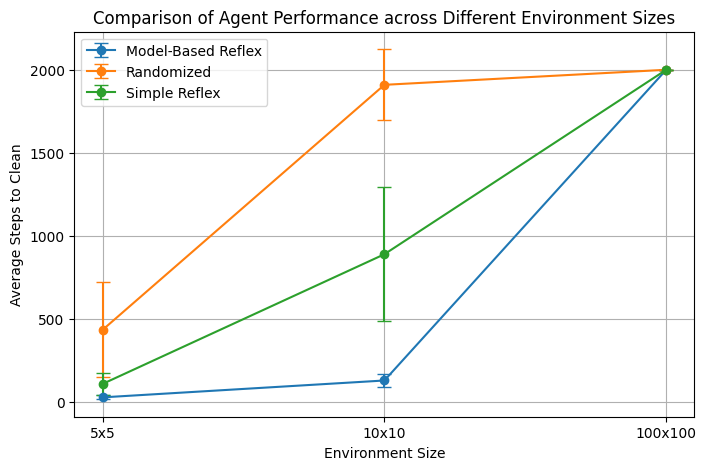

In [ ]:
# ==== Vẽ biểu đồ ====
plt.figure(figsize=(8,5))
for agent_name, group in df_all.groupby("Agent"):
    plt.errorbar(group["Size"], group["Avg Steps"], yerr=group["Std Dev"], label=agent_name, capsize=5, marker="o")

plt.title("Comparison of Agent Performance across Different Environment Sizes")
plt.xlabel("Environment Size")
plt.ylabel("Average Steps to Clean")
plt.legend()
plt.grid(True)
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
1. Phòng hình chữ nhật với kích thước không xác định
Agent	Phân tích
Randomized Agent	Không bị ảnh hưởng nhiều, vì nó di chuyển ngẫu nhiên. Tuy nhiên, do không biết kích thước, nó có thể đi quá xa hoặc không bao giờ làm sạch hết. Hiệu suất kém.
Simple Reflex Agent	Có thể hoạt động tốt nếu cảm biến bumper đúng, vì nó tránh tường được. Nhưng vì không nhớ vị trí, nó có thể lặp lại hành động không cần thiết.
Model-Based Reflex Agent	Có thể tự khám phá kích thước phòng bằng cách ghi nhớ các vị trí đã thăm. Khi đủ thời gian, nó sẽ dọn sạch toàn bộ phòng, dù không biết kích thước ban đầu.
2. Phòng có hình dạng không đều (ví dụ hành lang nối hai phòng)
Agent	Phân tích
Randomized Agent	Có thể tình cờ tìm được tất cả khu vực, nhưng mất rất nhiều thời gian.
Simple Reflex Agent	Không thể lên kế hoạch đi qua các hành lang hẹp hoặc lối rẽ, dễ bị mắc kẹt trong một vùng.
Model-Based Reflex Agent	Có thể xử lý tốt hơn nhờ ghi nhớ những ô đã thăm, giúp nó quay lại và tìm đường vào các vùng chưa sạch.
3. Phòng có chướng ngại vật (tác tử không thể đi qua)
Agent	Phân tích
Randomized Agent	Có thể đâm vào vật cản nhiều lần nhưng cuối cùng sẽ né được do ngẫu nhiên. Hiệu suất thấp.
Simple Reflex Agent	Tránh được vật cản nếu bumper hoạt động tốt, nhưng không có chiến lược đi vòng qua, dễ bị lặp lại.
Model-Based Reflex Agent	Có thể “học” rằng một ô là chướng ngại và chọn hướng khác để tiếp tục quét. Là tác tử duy nhất có thể làm sạch toàn bộ khu vực phức tạp.
4. Cảm biến bụi (dirt sensor) không chính xác — sai 10%
Agent	Phân tích
Randomized Agent	Không phụ thuộc nhiều vào cảm biến nên ít bị ảnh hưởng.
Simple Reflex Agent	Sẽ hút không cần thiết hoặc bỏ sót bụi trong 10% trường hợp, dẫn đến hiệu suất giảm.
Model-Based Reflex Agent	Có thể bù lỗi phần nào nhờ việc ghi nhớ: nếu đã hút một ô nhưng vẫn phát hiện bẩn, có thể bỏ qua hoặc kiểm tra lại. Hoạt động ổn định nhất.
5. Cảm biến va chạm (bumper sensor) không chính xác — sai 10%
Agent	Phân tích
Randomized Agent	Có thể di chuyển vào tường trong mô phỏng, nhưng ảnh hưởng nhỏ vì hành vi ngẫu nhiên.
Simple Reflex Agent	Có thể cố đi qua tường và bị mắc kẹt trong vòng lặp.
Model-Based Reflex Agent	Có thể phát hiện lỗi khi vị trí không hợp lý (vượt giới hạn) và điều chỉnh hướng di chuyển. Do có bộ nhớ, tác tử này ổn định nhất.

SyntaxError: invalid character '“' (U+201C) (ipython-input-3557514303.py, line 15)

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

        Agent  Cleaned  Uncleaned  Energy   Score
0      Random     4.30      15.64   200.0 -126.98
1      Reflex     9.44      11.22   200.0 -113.00
2  ModelBased     0.82      18.78   200.0 -136.74
3    Improved     0.00      20.04   200.0 -140.08


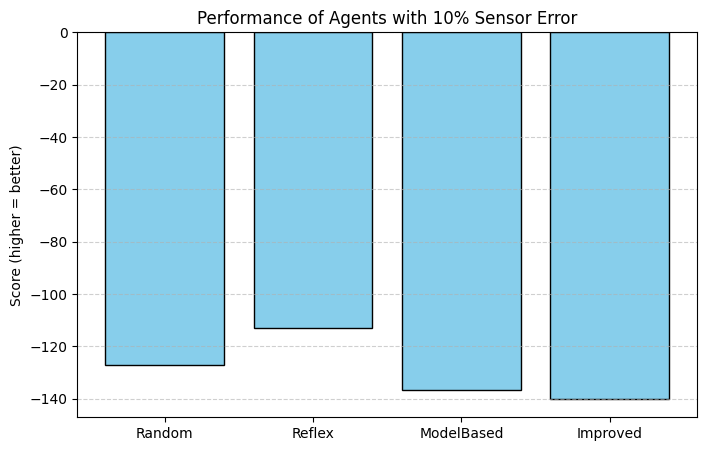

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ======================
# ENVIRONMENT
# ======================
class VacuumEnvironment:
    def __init__(self, width=5, height=5, dirt_prob=0.2, sensor_error=0.1, max_steps=200):
        self.width = width
        self.height = height
        self.dirt_prob = dirt_prob
        self.sensor_error = sensor_error
        self.max_steps = max_steps
        self.reset()

    def reset(self):
        self.grid = np.random.choice([0, 1], (self.height, self.width),
                                     p=[1-self.dirt_prob, self.dirt_prob])
        self.agent_pos = [random.randint(0, self.height-1), random.randint(0, self.width-1)]
        self.steps = 0
        self.cleaned = 0
        self.energy = 0

    def sense_dirty(self):
        """10% chance to get wrong reading."""
        true_dirty = self.grid[self.agent_pos[0], self.agent_pos[1]] == 1
        if random.random() < self.sensor_error:
            return not true_dirty
        return true_dirty

    def move(self, action):
        x, y = self.agent_pos
        self.energy += 1
        if action == 'north' and x > 0:
            self.agent_pos[0] -= 1
        elif action == 'south' and x < self.height - 1:
            self.agent_pos[0] += 1
        elif action == 'west' and y > 0:
            self.agent_pos[1] -= 1
        elif action == 'east' and y < self.width - 1:
            self.agent_pos[1] += 1
        elif action == 'suck':
            if self.grid[x, y] == 1:
                self.grid[x, y] = 0
                self.cleaned += 1

    def run(self, agent):
        self.reset()
        while self.steps < self.max_steps:
            self.steps += 1
            percept = self.sense_dirty()
            action = agent(percept)
            self.move(action)
        uncleaned = np.sum(self.grid)
        return self.cleaned, uncleaned, self.energy


# ======================
# AGENTS
# ======================

def randomized_agent(percept):
    return random.choice(['north', 'south', 'east', 'west', 'suck'])

def simple_reflex_agent(percept):
    if percept:
        return 'suck'
    else:
        return random.choice(['north', 'south', 'east', 'west'])

class ModelBasedAgent:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.pos = [0, 0]
        self.last_action = 'east'

    def __call__(self, percept):
        if percept:
            return 'suck'
        # move deterministically to explore
        if self.last_action == 'east':
            self.last_action = 'south'
        elif self.last_action == 'south':
            self.last_action = 'west'
        elif self.last_action == 'west':
            self.last_action = 'north'
        else:
            self.last_action = 'east'
        return self.last_action


# ======================
# IMPROVED MODEL-BASED AGENT
# ======================

class ImprovedModelBasedAgent:
    def __init__(self, width, height, sensor_error=0.1):
        self.width = width
        self.height = height
        self.sensor_error = sensor_error
        self.belief = np.full((height, width), 0.5)
        self.pos = [0, 0]
        self.last_action = 'east'

    def update_belief(self, percept):
        x, y = self.pos
        p_dirt = self.belief[x, y]
        if percept:
            p_sensor = (1 - self.sensor_error)
        else:
            p_sensor = self.sensor_error
        self.belief[x, y] = min(max(p_dirt * p_sensor, 0.0), 1.0)

    def __call__(self, percept):
        x, y = self.pos
        self.update_belief(percept)

        if self.belief[x, y] > 0.5:
            self.belief[x, y] = 0.0
            return 'suck'

        self.last_action = random.choice(['north', 'south', 'east', 'west'])
        return self.last_action


# ======================
# EXPERIMENT RUNNER (đã fix)
# ======================

def run_experiments(agent_factory, runs=20, width=5, height=5):
    results = []
    for _ in range(runs):
        env = VacuumEnvironment(width=width, height=height, sensor_error=0.1)

        # Nếu agent_factory là class → khởi tạo agent mới
        if isinstance(agent_factory, type):
            agent = agent_factory(width, height)
        else:
            # là function (random hoặc reflex)
            agent = agent_factory

        cleaned, uncleaned, energy = env.run(agent)
        results.append((cleaned, uncleaned, energy))
    return np.array(results)


# ======================
# RUN ALL EXPERIMENTS
# ======================

agents = {
    'Random': randomized_agent,
    'Reflex': simple_reflex_agent,
    'ModelBased': ModelBasedAgent,
    'Improved': ImprovedModelBasedAgent
}

summary = []
for name, ag in agents.items():
    data = run_experiments(ag, runs=50, width=10, height=10)
    cleaned, uncleaned, energy = data.mean(axis=0)
    score = cleaned - 0.5 * energy - 2 * uncleaned  # tradeoff
    summary.append({
        'Agent': name,
        'Cleaned': round(cleaned, 2),
        'Uncleaned': round(uncleaned, 2),
        'Energy': round(energy, 2),
        'Score': round(score, 2)
    })

df = pd.DataFrame(summary)
print(df)

# ======================
# VISUALIZATION
# ======================

plt.figure(figsize=(8, 5))
plt.bar(df['Agent'], df['Score'], color='skyblue', edgecolor='black')
plt.title('Performance of Agents with 10% Sensor Error')
plt.ylabel('Score (higher = better)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Paste the environment + bfs + explorer agent from earlier as a single runnable block
import numpy as np
from collections import deque
import random
import matplotlib.pyplot as plt

def make_env_with_obstacles(size, dirt_prob=0.2, obstacle_prob=0.1, dirt_sensor_error=0.0, max_steps=1000):
    grid = np.random.choice([0,1,-1], size=(size,size), p=[1-dirt_prob-obstacle_prob, dirt_prob, obstacle_prob])
    free = [(i,j) for i in range(size) for j in range(size) if grid[i,j] != -1]
    start = random.choice(free)
    pos = list(start)
    def bumpers_at(p):
        x,y = p
        return {
            "north": x==0 or grid[x-1,y] == -1,
            "south": x==size-1 or grid[x+1,y] == -1,
            "west":  y==0 or grid[x,y-1] == -1,
            "east":  y==size-1 or grid[x,y+1] == -1
        }
    def noisy_dirt(p):
        x,y = p
        true = grid[x,y] == 1
        if np.random.rand() < dirt_sensor_error:
            return not true
        return true
    def step(agent_fn):
        nonlocal pos, grid
        steps=0; cleaned=0
        while np.any(grid==1) and steps < max_steps:
            steps+=1
            b = bumpers_at(pos)
            d = noisy_dirt(pos)
            a = agent_fn(b, d)
            x,y = pos
            if a == "suck":
                if grid[x,y] == 1:
                    grid[x,y] = 0; cleaned +=1
            elif a=="north" and not b["north"]:
                pos[0]-=1
            elif a=="south" and not b["south"]:
                pos[0]+=1
            elif a=="west" and not b["west"]:
                pos[1]-=1
            elif a=="east" and not b["east"]:
                pos[1]+=1
        remaining = int(np.sum(grid==1))
        return steps, cleaned, remaining, grid.copy()
    return {"step": step, "start": start, "grid": grid.copy()}

def bfs_shortest_path(known_grid, start, goals):
    n = known_grid.shape[0]
    q = deque()
    q.append((start, []))
    visited = set([start])
    directions = [("north",(-1,0)), ("south",(1,0)), ("west",(0,-1)), ("east",(0,1))]
    while q:
        (x,y), path = q.popleft()
        if (x,y) in goals:
            return path
        for name, (dx,dy) in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < n and 0 <= ny < n and (nx,ny) not in visited:
                if known_grid[nx,ny] != -1: # not known obstacle
                    visited.add((nx,ny))
                    q.append(((nx,ny), path+[name]))
    return None

def make_explorer_agent(size):
    known = np.full((size,size), -99)  # unknown
    pos = [0,0]
    def agent(bumpers, dirty_sensor):
        nonlocal pos, known
        x,y = pos
        known[x,y] = 1 if dirty_sensor else 0
        if dirty_sensor:
            return "suck"
        dirty_cells = {(i,j) for i in range(size) for j in range(size) if known[i,j]==1}
        if dirty_cells:
            path = bfs_shortest_path(known, tuple(pos), dirty_cells)
            if path:
                move = path[0]
                if move=="north": pos[0]-=1
                elif move=="south": pos[0]+=1
                elif move=="west": pos[1]-=1
                elif move=="east": pos[1]+=1
                return move
        for d,(dx,dy) in [("north",(-1,0)),("south",(1,0)),("west",(0,-1)),("east",(0,1))]:
            nx,ny = x+dx, y+dy
            if 0 <= nx < size and 0 <= ny < size and known[nx,ny]==-99 and not bumpers[d]:
                if d=="north": pos[0]-=1
                elif d=="south": pos[0]+=1
                elif d=="west": pos[1]-=1
                elif d=="east": pos[1]+=1
                return d
        for d in ["north","east","south","west"]:
            if not bumpers[d]:
                if d=="north": pos[0]-=1
                elif d=="south": pos[0]+=1
                elif d=="west": pos[1]-=1
                elif d=="east": pos[1]+=1
                return d
        return "suck"
    return agent

# quick run
env = make_env_with_obstacles(10, dirt_prob=0.2, obstacle_prob=0.15, dirt_sensor_error=0.0, max_steps=1000)
agent = make_explorer_agent(10)
steps, cleaned, remaining, final_grid = env["step"](agent)
print("steps", steps, "cleaned", cleaned, "remaining", remaining)


steps 1000 cleaned 6 remaining 18
